In [2]:
%pip install torch

In [ ]:
%pip install torchvision

  Using cached torch-2.1.2-cp39-cp39-win_amd64.whl.metadata (26 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 3.2 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.1 MB 1.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.1 MB 2.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.1 MB 1.8 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.1 MB 2.4 MB/s eta 0:00:01
   ------------------------- -------------- 0.7/1.1 MB 2.7 MB/s eta 0:00:01
   -------------------------------- ------- 0.9/1.1 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 3.0 MB/s eta 0:00:00
Using cached torch-2.1.2-cp39-cp39-win_amd64.whl (192.2 MB)
   ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
   ---------------------------------------- 62.6/

In [3]:
import torch

print(torch.__version__)

2.1.0+cu121


In [9]:
import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html

  Using cached fvcore-0.1.5.post20221221.tar.gz (50 kB)
  Preparing metadata (setup.py) ... done
  Using cached iopath-0.1.10.tar.gz (42 kB)
  Preparing metadata (setup.py) ... done
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
  Using cached portalocker-2.8.2-py3-none-any.whl (17 kB)
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=9fae8613133f63259772528f9ea55d23beeb1891f62dcbc5b6ff7a0938b1e00f
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=737f8d581dce5ca96771f341d72d4f3408a1efbeed3794258ea14cbe05a421ad
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py310_cu121_pyt210/download.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [10]:
%pip install trimesh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.9/688.9 kB 3.8 MB/s eta 0:00:00


In [11]:
%pip install 'git+https://github.com/marian42/mesh_to_sdf'

  Cloning https://github.com/marian42/mesh_to_sdf to /tmp/pip-req-build-fk12pyj4
  Running command git clone --filter=blob:none --quiet https://github.com/marian42/mesh_to_sdf /tmp/pip-req-build-fk12pyj4
  Resolved https://github.com/marian42/mesh_to_sdf to commit 66036a747e82e7129f6afc74c5325d676a322114
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.3/858.3 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mesh-to-sdf: filename=mesh_to_sdf-0.0.14-py3-none-any.whl size=14485 sha256=c516048592a6c6616b4cf36695b7fa8d1502b7ba842c659a722248cf6574b9f8
  Stored in directory: /tmp/pip-ephem-wheel-cache-aqxt2fah/wheels/07/f1/7e/34ef42d1ac0c06e3ada1a1a35deaea1846d6e3117a16aae320
  Crea

In [12]:
import os

os.environ['PYOPENGL_PLATFORM'] = 'egl'

import torch

from mesh_to_sdf import mesh_to_sdf, sample_sdf_near_surface
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline



# untilitis
from pytorch3d.utils import ico_sphere

# loss functions and regulaziers
from pytorch3d.loss import (
    chamfer_distance,
    mesh_edge_loss,
    mesh_laplacian_smoothing,
    mesh_normal_consistency
)
# io utils
from pytorch3d.io import load_obj

# operations with data
from pytorch3d.ops import sample_points_from_meshes
# datastructures
from pytorch3d.structures import Meshes
from pytorch3d.renderer import TexturesVertex, Textures

# render
from pytorch3d.renderer import (
    look_at_view_transform,
    OpenGLPerspectiveCameras,
    DirectionalLights,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    HardPhongShader
)

# trimesh lib imports
import trimesh
from trimesh.voxel.creation import voxelize

In [13]:
# If you have got a CUDA device, you can use GPU mode
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    torch.cuda.set_device(device)
else:
    device = torch.device('cpu')

In [14]:
path_to_model = "spiderman.obj"

# Trimesh spiderman .obj model
spiderman_trimesh = trimesh.load(path_to_model)

if isinstance(spiderman_trimesh, trimesh.Scene):
    spiderman_trimesh = spiderman_trimesh.dump(concatenate=True)

spiderman_trimesh.vertices -= spiderman_trimesh.center_mass
scaling = 2 / spiderman_trimesh.scale
spiderman_trimesh.apply_scale(scaling=scaling)

# Rainbow spiderman in trimesh
# for facet in spiderman_trimesh.facets:
#   spiderman_trimesh.visual.face_colors[facet] = trimesh.visual.random_color()

#spiderman mesh in pytorch3d
verts, faces_idx, _ = load_obj(path_to_model)
faces = faces_idx.verts_idx

center = verts.mean(0)
verts = verts - center
scale = max(verts.abs().max(0)[0])
verts = verts / scale

# Initialize each vertex to be white in color.
verts_rgb = torch.ones_like(verts)[None]  # (1, V, 3)

# Rainbow spiderman in pytorch3d
# verts_rgb = torch.rand_like(verts)[None]

textures = Textures(verts_rgb=verts_rgb.to(device))

# Create a Meshes object for the spiderman.
spiderman_mesh = Meshes(
    verts=[verts.to(device)],
    faces=[faces.to(device)],
    textures=textures
)

/usr/local/lib/python3.10/dist-packages/pytorch3d/io/obj_io.py:548: UserWarning: Mtl file does not exist: spiderman.mtl
  warnings.warn(f"Mtl file does not exist: {f}")


In [15]:
# Initialize an OpenGL perspective camera.
cameras = OpenGLPerspectiveCameras(device=device)

# We will also create a phong renderer. This is simpler and only needs to render one face per pixel.
raster_settings = RasterizationSettings(
    image_size=1024,
    blur_radius=0,
    faces_per_pixel=1,
)

# We can add a point light in front of the object.
#lights = PointLights(device=device, location=((2.0, 2.0, -2.0),))
ambient_color = torch.FloatTensor([[0.0, 0.0, 0.0]]).to(device)
diffuse_color = torch.FloatTensor([[1.0, 1.0, 1.0]]).to(device)
specular_color = torch.FloatTensor([[0.1, 0.1, 0.1]]).to(device)
direction = torch.FloatTensor([[1, 1, 1]]).to(device)
lights = DirectionalLights(ambient_color=ambient_color,
                           diffuse_color=diffuse_color,
                           specular_color=specular_color,
                           direction=direction,
                           device=device)

phong_renderer = MeshRenderer(
    rasterizer=MeshRasterizer(
        cameras=cameras,
        raster_settings=raster_settings
    ),
    shader=HardPhongShader(
        device=device,
        cameras=cameras,
        lights=lights
        )
)

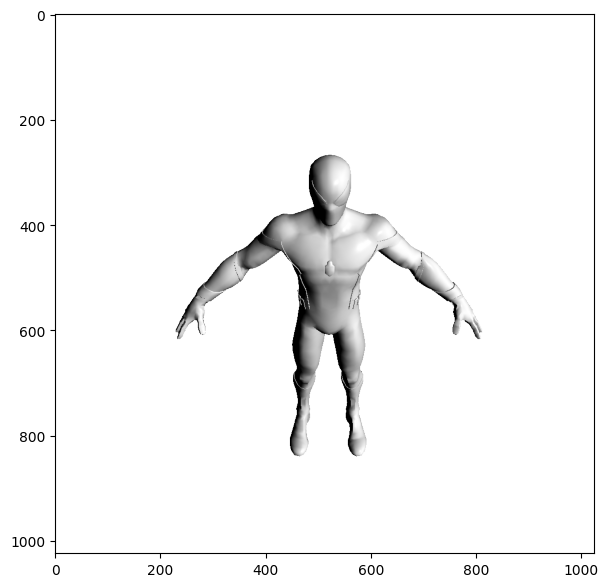

In [16]:
# Select the viewpoint using spherical angles
distance = 2.0   # distance from camera to the object`
elevation = 40.0   # angle of elevation in degrees
azimuth = 0.0  # No rotation so the camera is positioned on the +Z axis.

# Get the position of the camera based on the spherical angles
R, T = look_at_view_transform(distance, elevation, azimuth, device=device,at=((-0.02,0.1,0.0),))

# Render the  spiderman providing the values of R and T.
image_spider = phong_renderer(meshes_world=spiderman_mesh, R=R, T=T)

image_spider = image_spider.cpu().numpy()

plt.figure(figsize=(7, 7))
plt.imshow(image_spider.squeeze())
plt.grid(False)

Воксельная модель

In [31]:

low_idx_spiderman = spiderman_trimesh.scale / 15
high_idx_spiderman = spiderman_trimesh.scale / 39
vox_high_spiderman = voxelize(spiderman_trimesh,pitch=high_idx_spiderman)
vox_high_spiderman.show()

Облако точек

In [21]:
def plot_pointcloud(points, elev=70, azim=-70, title=""):
    # Sample points uniformly from the surface of the mesh.
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    #ax = Axes3D(fig)
    x, y, z = points
    ax.scatter3D(x, z, -y,marker='.')
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_zlabel('y')
    ax.set_title(title)
    ax.view_init(elev, azim)
    plt.show()

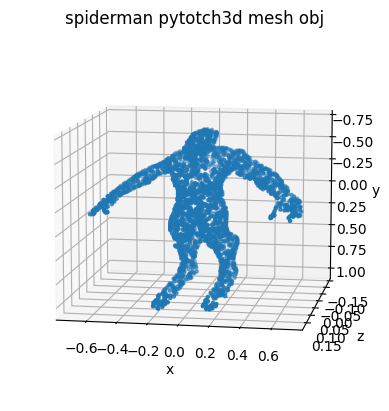

In [30]:
points = sample_points_from_meshes(spiderman_mesh, 3000)
points = points.clone().detach().cpu().squeeze().unbind(1)
plot_pointcloud(points, elev=190, azim=-100, title='spiderman pytotch3d mesh obj')

Функциональная модель

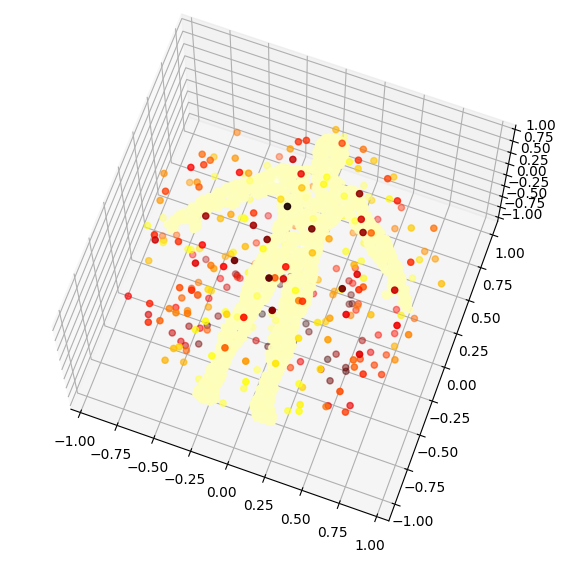

In [20]:
points, sdf = sample_sdf_near_surface(spiderman_trimesh, number_of_points=5000)
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=70, azim=-70)
ax.scatter(points[:, 0], points[:, 1], zs=-points[:, 2], c=sdf, cmap="hot_r")